In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
df.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
print(df.isnull().sum())

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64


# There are no nan values in Dataset

In [5]:
df.describe

<bound method NDFrame.describe of      Ticket #                                 Customer Complaint      Date  \
0      250635                      Comcast Cable Internet Speeds  22-04-15   
1      223441       Payment disappear - service got disconnected  04-08-15   
2      242732                                  Speed and Service  18-04-15   
3      277946  Comcast Imposed a New Usage Cap of 300GB that ...  05-07-15   
4      307175         Comcast not working and no service to boot  26-05-15   
...       ...                                                ...       ...   
2219   213550                               Service Availability  04-02-15   
2220   318775         Comcast Monthly Billing for Returned Modem  06-02-15   
2221   331188                            complaint about comcast  06-09-15   
2222   360489             Extremely unsatisfied Comcast customer  23-06-15   
2223   363614               Comcast, Ypsilanti MI Internet Speed  24-06-15   

     Date_month_year         

In [6]:
df.shape

(2224, 11)

In [8]:
df.head()

,Customer Complaint,Date,Date_month_year,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,Payment disappear - service got disconnected,04-08-15,04-Aug-15,Internet,Acworth,Georgia,30102,Closed,No
2,Speed and Service,18-04-15,18-Apr-15,Internet,Acworth,Georgia,30101,Closed,Yes
3,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,Internet,Acworth,Georgia,30101,Open,Yes
4,Comcast not working and no service to boot,26-05-15,26-May-15,Internet,Acworth,Georgia,30101,Solved,No


# Task-1 Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [9]:
#Pandas to_datettime() method helps to convert sting Date time into python Date time object.
df['Date_month_year']=df['Date_month_year'].apply(pd.to_datetime)
#setting 'Date_month_year' as index 
df= df.set_index('Date_month_year')

### plotting monthly chart 

Text(0.5, 1.0, 'MONTHLY TREND CHART')

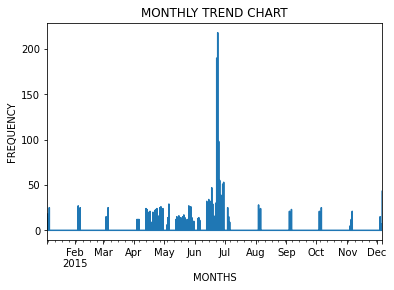

In [10]:
#datframe.grouby() function is splitting the data into groups according to frequency
months= df.groupby(pd.Grouper(freq="H")).size().plot()
plt.xlabel("MONTHS")
plt.ylabel("FREQUENCY")
plt.title("MONTHLY TREND CHART")

### Note : In the month of June 2015 the complaints very at maximum

In [11]:
#value_counts() function is getting a sreies containing counts of unique values for date column.
df['Date'].value_counts(dropna=False)[:8]

24-06-15    218
23-06-15    190
25-06-15     98
26-06-15     55
30-06-15     53
29-06-15     51
18-06-15     47
06-12-15     43
Name: Date, dtype: int64

### plotting daily chart

Text(0.5, 1.0, 'DAILY TREND CHART')

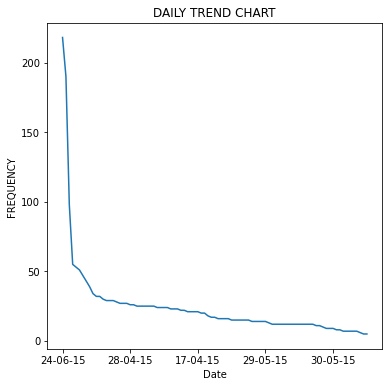

In [12]:
df = df.sort_values(by='Date')
plt.figure(figsize=(6,6))
df['Date'].value_counts().plot()
plt.xlabel("Date")
plt.ylabel("FREQUENCY")
plt.title("DAILY TREND CHART")

# Provide a table with the frequency of complaint types.

In [13]:
df[('Customer Complaint')].value_counts(dropna = False)[:9]

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Data Caps                   11
Comcast Billing             11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data caps            8
Name: Customer Complaint, dtype: int64

<AxesSubplot:>

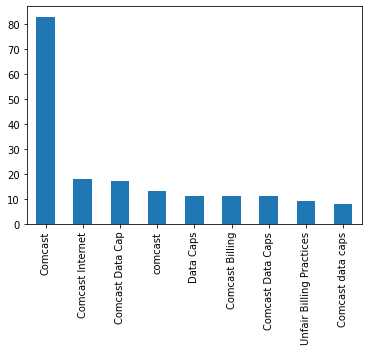

In [14]:
df['Customer Complaint'].value_counts(dropna=False)[:9].plot.bar()

# Task -3 Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [15]:
internet_issues1=df[df['Customer Complaint'].str.contains("network")].count()

In [16]:
internet_issues2=df[df['Customer Complaint'].str.contains("speed")].count()

In [17]:
internet_issues3=df[df['Customer Complaint'].str.contains("data")].count()

In [18]:
internet_issues4=df[df['Customer Complaint'].str.contains("internet")].count()

In [19]:
billing_issues1=df[df['Customer Complaint'].str.contains("bill")].count()

In [20]:
billing_issues2=df[df['Customer Complaint'].str.contains("billing")].count()

In [21]:
billing_issues3=df[df['Customer Complaint'].str.contains("charges")].count()

In [22]:
service_issues1=df[df['Customer Complaint'].str.contains("service")].count()

In [23]:
service_issues2=df[df['Customer Complaint'].str.contains("customer")].count()

In [24]:
total_internet_issues=internet_issues1+internet_issues2+internet_issues3+internet_issues4

In [25]:
print(total_internet_issues)

Customer Complaint             374
Date                           374
Received Via                   374
City                           374
State                          374
Zip code                       374
Status                         374
Filing on Behalf of Someone    374
dtype: int64


In [26]:
total_billing_issues = billing_issues1+billing_issues2+billing_issues3
print(total_billing_issues)

Customer Complaint             353
Date                           353
Received Via                   353
City                           353
State                          353
Zip code                       353
Status                         353
Filing on Behalf of Someone    353
dtype: int64


In [27]:
total_service_issues = service_issues1+ service_issues2
print(total_service_issues)

Customer Complaint             360
Date                           360
Received Via                   360
City                           360
State                          360
Zip code                       360
Status                         360
Filing on Behalf of Someone    360
dtype: int64


In [28]:
other_issues=2224-(total_internet_issues+total_billing_issues+total_service_issues)
print(other_issues)

Customer Complaint             1137
Date                           1137
Received Via                   1137
City                           1137
State                          1137
Zip code                       1137
Status                         1137
Filing on Behalf of Someone    1137
dtype: int64


### Note: From the above analysis we can say that other issues are maxmimum

# Task-4 Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [29]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [32]:
df["newStatus"] = ["Open" if Status=="Open" or Status=="Pending else" else "Closed" for Status in df["Status"]]
df= df.drop(['Status'],axis=1)
df

,Customer Complaint,Date,Received Via,City,State,Zip code,Filing on Behalf of Someone,newStatus
Date_month_year,,,,,,,,
2015-01-04,Fraudulent claims reported to collections agency,04-01-15,Customer Care Call,Atlanta,Georgia,30312,No,Closed
2015-01-04,Comcast refusal of service,04-01-15,Customer Care Call,Wayne,Pennsylvania,19087,No,Closed
2015-01-04,Comcast Cable,04-01-15,Internet,Franklin,Tennessee,37067,No,Closed
2015-01-04,Data Overages,04-01-15,Internet,Savannah,Georgia,31406,No,Closed
2015-01-04,Comcast,04-01-15,Internet,North Huntingdon,Pennsylvania,15642,No,Closed
...,...,...,...,...,...,...,...,...
2015-05-31,Comcast,31-05-15,Customer Care Call,Beaverton,Oregon,97006,No,Closed
2015-05-31,Comcast of East Windsor NJ Complaint,31-05-15,Internet,East Windsor,New Jersey,8520,No,Closed
2015-05-31,n/a (b) (6),31-05-15,Internet,Loganville,Georgia,30052,No,Closed


# Task -5 which state has the maximum complaints

In [34]:
df.groupby(["State"]).size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

### Note :Georgia has the maximum complaints 

# Task-6 Provide state wise status of complaints in a stacked bar chart.

In [36]:
Status_complaints = df.groupby(["State","newStatus"]).size().unstack()
print(Status_complaints)

newStatus             Closed  Open
State                             
Alabama                 22.0   4.0
Arizona                 18.0   2.0
Arkansas                 6.0   NaN
California             173.0  47.0
Colorado                68.0  12.0
Connecticut             10.0   2.0
Delaware                 9.0   3.0
District Of Columbia    15.0   1.0
District of Columbia     1.0   NaN
Florida                205.0  35.0
Georgia                253.0  35.0
Illinois               141.0  23.0
Indiana                 51.0   8.0
Iowa                     1.0   NaN
Kansas                   2.0   NaN
Kentucky                 7.0   NaN
Louisiana               13.0   NaN
Maine                    3.0   2.0
Maryland                65.0  13.0
Massachusetts           51.0  10.0
Michigan                97.0  18.0
Minnesota               31.0   2.0
Mississippi             30.0   9.0
Missouri                 3.0   1.0
Montana                  1.0   NaN
Nevada                   1.0   NaN
New Hampshire       

<AxesSubplot:xlabel='State'>

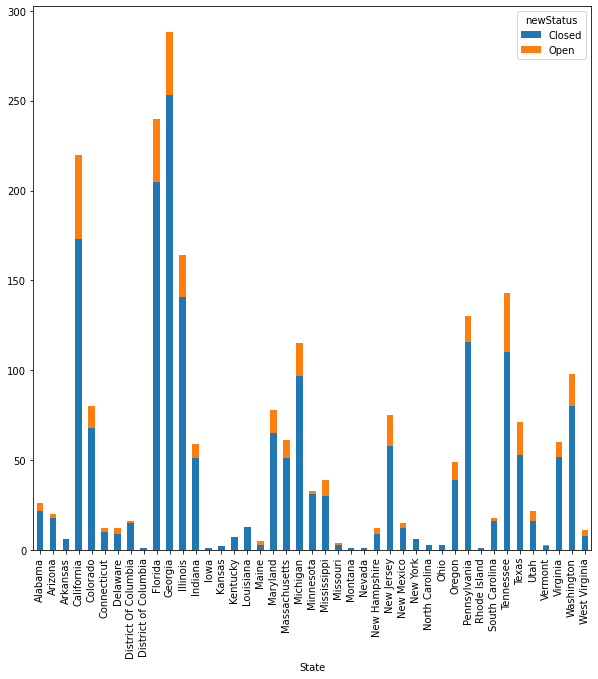

In [37]:
Status_complaints.plot.bar(figsize=(10,10), stacked=True)

# Task -7 State which has the highest percentage of unresolved complaints

In [38]:
print(df["newStatus"].value_counts())

Closed    1861
Open       363
Name: newStatus, dtype: int64


newStatus             Closed  Open  Unresolved_cmp_prct
State                                                  
California             173.0  47.0            12.947658
Georgia                253.0  35.0             9.641873
Florida                205.0  35.0             9.641873
Tennessee              110.0  33.0             9.090909
Illinois               141.0  23.0             6.336088
Texas                   53.0  18.0             4.958678
Michigan                97.0  18.0             4.958678
Washington              80.0  18.0             4.958678
New Jersey              58.0  17.0             4.683196
Pennsylvania           116.0  14.0             3.856749
Maryland                65.0  13.0             3.581267
Colorado                68.0  12.0             3.305785
Oregon                  39.0  10.0             2.754821
Massachusetts           51.0  10.0             2.754821
Mississippi             30.0   9.0             2.479339
Virginia                52.0   8.0             2

<AxesSubplot:xlabel='State'>

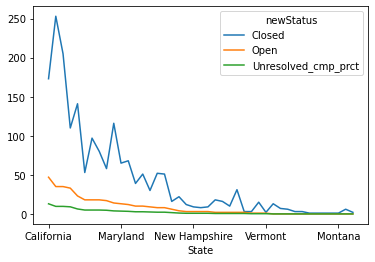

In [40]:
unresolved_data = df.groupby(["State","newStatus"]).size().unstack().fillna(0).sort_values(by='Open',ascending=False)
unresolved_data['Unresolved_cmp_prct'] = unresolved_data['Open']/unresolved_data['Open'].sum()*100
print(unresolved_data)
unresolved_data.plot()

### Note : From the table generated above we can see that Georgia has maximum unresolved complaints i.e.80

# Task -8 Provide the percentage of complaints resolved till date, which were received through the internet and the customer care calls 

In [44]:
resolved_data = df.groupby(['Received Via','newStatus']).size().unstack().fillna(0)
resolved_data['resolved'] = resolved_data['Closed']/resolved_data['Closed'].sum()*100
resolved_data['resolved']

Received Via
Customer Care Call    50.134336
Internet              49.865664
Name: resolved, dtype: float64

<AxesSubplot:xlabel='Received Via'>

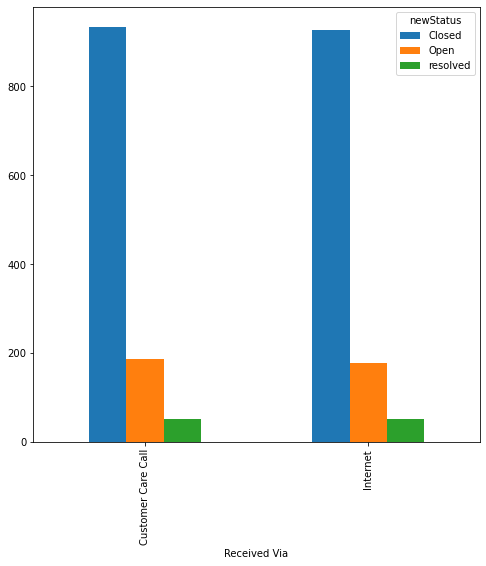

In [43]:
resolved_data.plot(kind="bar", figsize=(8,8))

## Note : From the above pie chart we can say that there are total 50.61% complaints resolved for Customer Care Cell and 49.39% for received via internet.

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
